In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
import pydicom
import numpy as np
import os
from ipywidgets import interact

In [117]:
def load_scan(path):
    slices = [pydicom.dcmread(path + '/' + s) for s in               
              os.listdir(path)]
    slices = [s for s in slices if 'SliceLocation' in s]
    slices.sort(key = lambda x: int(x.InstanceNumber))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
    for s in slices:
        s.SliceThickness = slice_thickness
    return slices
# def get_pixels_hu(scans):
#     image = np.stack([s.pixel_array for s in scans])
#     image = image.astype(np.int16)
#     image[image == -2000] = 0
# #     intercept = scans[0].RescaleIntercept
# #     slope = scans[0].RescaleSlope
# #     if slope != 1:
# #         image = slope * image.astype(np.float64)
# #         image = image.astype(np.int16)
# #     image += np.int16(intercept)
#     return np.array(image, dtype=np.int16)


def get_pixels_hu(scans):
    image=[s.pixel_array for s in scans]
    for a in range(len(image)):
        if len(image[a])!=512:
#             print("call:")
#             print(len(image[a]))
            image[a]=np.kron(image[a], np.ones((2,2)))
    image = np.stack([s for s in image])        
            
    image = image.astype(np.int16)
    image[image == -2000] = 0
#     intercept = scans[0].RescaleIntercept
#     slope = scans[0].RescaleSlope
#     if slope != 1:
#         image = slope * image.astype(np.float64)
#         image = image.astype(np.int16)
#     image += np.int16(intercept)
    return np.array(image, dtype=np.int16)


# def get_pixels_hu(scans):
#     image=[]
#     for s in scans:
#         if len(s.pixel_array)!=512:
#             temp=np.kron(s.pixel_array, np.ones((2,2)))
#             temp=temp.astype(np.int16)
#             image.append(temp)
#         else:
#             temp=s.pixel_array.astype(np.int16)
#             image.append(temp)         
# #     image = image.astype(np.int16)
#     image[image == -2000] = 0
#     return np.array(image)
# #     intercept = scans[0].RescaleIntercept
# #     slope = scans[0].RescaleSlope
# #     if slope != 1:
# #         image = slope * image.astype(np.float64)
# #         image = image.astype(np.int16)
# #     image += np.int16(intercept)
# #     return np.array(image, dtype=np.int16)

In [118]:
path = r'/Users/app/Desktop/CT项目/CT数据/1-P4P100S300I00003 Gated 0.0A-29193'
path2 = r'/Users/app/Desktop/CT项目/before'
patient_dicom = load_scan(path2)
# print(patient_dicom[0])
patient_pixels = get_pixels_hu(patient_dicom)

(512, 512)
(1024, 1024)


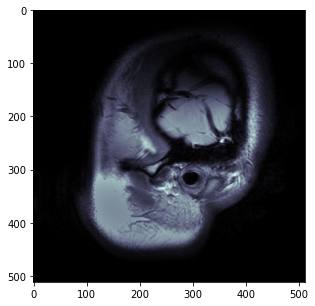

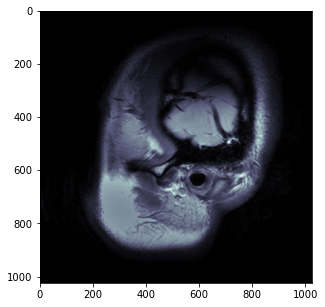

In [119]:
plt.figure(figsize=(5,5))
plt.imshow(patient_pixels[11], cmap=plt.cm.bone)
test=np.kron(patient_pixels[11], np.ones((2,2)))
print(np.shape(patient_pixels[11]))
print(np.shape(test))
plt.figure(figsize=(5,5))
plt.imshow(test, cmap=plt.cm.bone)

In [120]:
plt.figure(1)
def dicom_animation(x):
    plt.figure(figsize=(5,5))
    plt.imshow(patient_pixels[x], cmap=plt.cm.bone)
    return x

<Figure size 432x288 with 0 Axes>

In [121]:
interact(dicom_animation, x=(0, len(patient_pixels)-1))

interactive(children=(IntSlider(value=62, description='x', max=124), Output()), _dom_classes=('widget-interact…

<function __main__.dicom_animation(x)>

In [68]:
def uniquevalue(path):
    slices = [pydicom.dcmread(path + '/' + s) for s in os.listdir(path)]
    IDs = [s.PatientID for s in slices]
    print("Patient ID:",np.unique(IDs))
    
#     Parts = [s.BodyPartExamined  for s in slices]
#     print("Body Part Examined:",np.unique(Parts))
        
    Positions = [s.PatientPosition  for s in slices]
    print("Patient Position:",np.unique(Positions))
    
path = r'/Users/app/Desktop/CT项目/CT数据/1-P4P100S300I00003 Gated 0.0A-29193'
path2 = r'/Users/app/Desktop/CT项目/before'
a=uniquevalue(path2)

Patient ID: ['0000141052']
Patient Position: ['HFS']


In [59]:
path2 = r'/Users/app/Desktop/CT项目/before'
test=[pydicom.dcmread(path2 + '/' + s) for s in               
              os.listdir(path2)]